# Geographic Data Science with Python - Assignment

---

## Section 1: Summary of Readings

### 1. Python and Libraries Refresher  
- **NumPy**: Fundamental package for numerical computing in Python, providing arrays and mathematical functions.   
- **matplotlib**: Visualization library for creating static, interactive, and animated plots.
- **pandas**: Data manipulation library, especially for tabular data (DataFrames). 
- **geopandas**: Extends pandas to allow spatial operations on geometric data types. It enables easy manipulation and analysis of geospatial vector data like points, lines, and polygons.  
- **geodatasets**: A Python package providing easy access to curated geographic datasets for testing and learning spatial analysis, simplifying data acquisition for GIS projects.

### 2. Coordinate Reference Systems (CRS), Shapefiles, GeoJSON  
- **CRS**: Defines how the 2D map coordinates relate to real-world locations. Important for ensuring data from different sources align spatially.  
- **Shapefiles**: A popular vector data format in GIS composed of multiple files (.shp, .shx, .dbf). Contains geometry and attribute data.  
- **GeoJSON**: A lightweight format for encoding geographic data structures using JSON. Supports points, lines, polygons and is widely used for web mapping.

### 3. Reading and Exploring Spatial Vector Data with GeoPandas  
- **GeoPandas** extends pandas to handle spatial data with geometry columns.  
- Reading shapefiles/GeoJSON with `gpd.read_file()` returns a GeoDataFrame.  
- GeoDataFrames support spatial operations, plotting, attribute queries, and CRS management.

### Key Takeaways from Readings  
- Spatial data manipulation and plotting is straightforward using GeoPandas.  
- Always check and set CRS properly for accurate spatial analysis.  
- Attribute filtering and CRS transformation are fundamental steps in spatial workflows.

---
## Section 2: Assignment - Read, Plot, Transform CRS, Filter Attributes

In [66]:
# Import required libraries
import geodatasets
import geopandas as gpd
import matplotlib.pyplot as plt

In [67]:
# Step 1: Read a shapefile
# For demonstration, we use a publicly available shapefile from the geodatasets package.
shapefile_path = geodatasets.get_path('naturalearth.land')

# Load the data
gdf = gpd.read_file(shapefile_path)

In [68]:
# Step 2: Explore the data
print("GeoDataFrame info:")
print(gdf.info())

print("\nCRS of original data:")
print(gdf.crs)

print("\nFirst 5 rows:")
print(gdf.head())

GeoDataFrame info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   featurecla  127 non-null    object  
 1   scalerank   127 non-null    int32   
 2   min_zoom    127 non-null    float64 
 3   geometry    127 non-null    geometry
dtypes: float64(1), geometry(1), int32(1), object(1)
memory usage: 3.6+ KB
None

CRS of original data:
EPSG:4326

First 5 rows:
  featurecla  scalerank  min_zoom  \
0       Land          1       1.0   
1       Land          1       1.0   
2       Land          1       0.0   
3       Land          1       1.0   
4       Land          1       1.0   

                                            geometry  
0  POLYGON ((-59.57209 -80.04018, -59.86585 -80.5...  
1  POLYGON ((-159.20818 -79.49706, -161.1276 -79....  
2  POLYGON ((-45.15476 -78.04707, -43.92083 -78.4...  
3  POLYGON ((-121.21151 -73.50099, -119.91885 

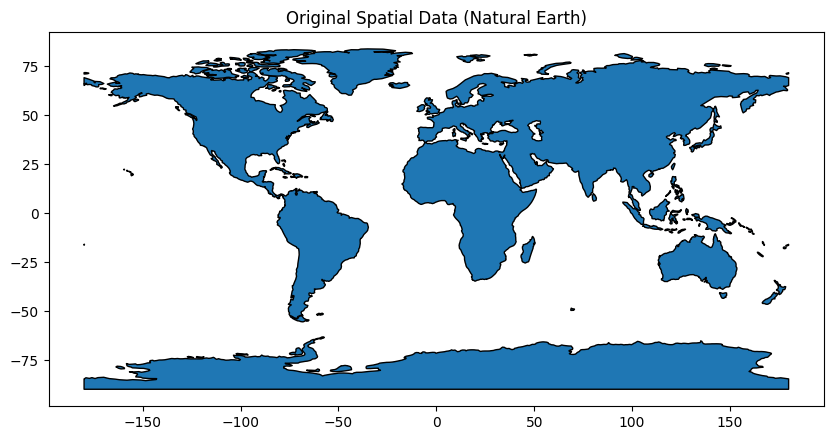

In [69]:
# Step 3: Plot original data
gdf.plot(figsize=(10, 6), edgecolor='black')
plt.title('Original Spatial Data (Natural Earth)')
plt.show()

        area_wgs84
count   127.000000
mean    169.267333
std    1014.327819
min       0.060987
25%       0.966769
50%       2.159905
75%      10.311642
max    8900.069900 

       area_mercator
count   1.270000e+02
mean    7.505830e+13
std     8.164727e+14
min     8.102946e+08
25%     1.488879e+10
50%     6.252105e+10
75%     3.056332e+11
max     9.201845e+15

CRS after transformation:
EPSG:3857


C:\Users\riley\AppData\Local\Temp\ipykernel_18404\53334587.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area_wgs84'] = gdf['geometry'].area


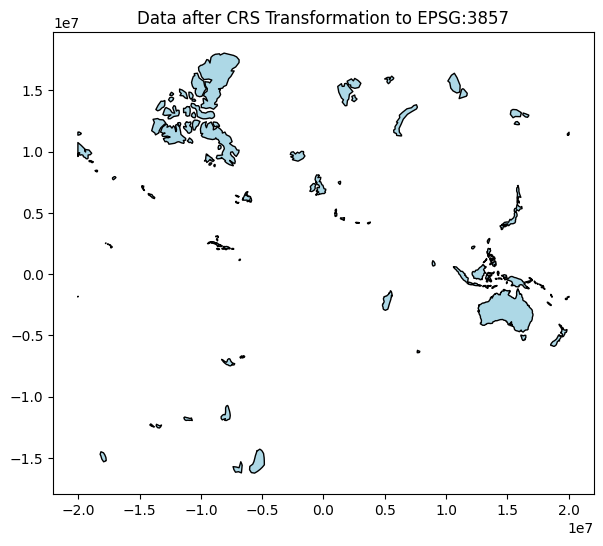

In [70]:
# Step 4: Demonstrate CRS transformation
# area in degrees^2 (not meaningful)
gdf['area_wgs84'] = gdf['geometry'].area  
print(gdf[['area_wgs84']].describe(), '\n')

# Transform from original CRS, EPSG:4326, to a projected CRS, EPSG:3857 Web Mercator
gdf_projected = gdf.to_crs(epsg=3857)

# area in m^2 (meaningful in projected CRS)
gdf_projected['area_mercator'] = gdf_projected['geometry'].area  
print(gdf_projected[['area_mercator']].describe())

print("\nCRS after transformation:")
print(gdf_projected.crs)

# Filter out polygons with tiny or huge area after projection
gdf_projected['area'] = gdf_projected['geometry'].area
gdf_projected = gdf_projected[(gdf_projected['area'] > 1e8) & (gdf_projected['area'] < 1e13)]

# Plot transformed data
gdf_projected.plot(figsize=(10, 6), edgecolor='black', color='lightblue')
plt.title('Data after CRS Transformation to EPSG:3857')
plt.show()

## 🌍 CRS Transformation and Area Calculation

In this section, we explored the impact of Coordinate Reference Systems (CRS) on geometric calculations — specifically, **area**.

Initially, the geometries were in **EPSG:4326**, a geographic CRS that represents coordinates in degrees. Calculating area in this CRS results in values measured in **degrees²**, which do **not correspond to real-world sizes**. This is why we observed a warning and meaningless area statistics in `area_wgs84`.

To resolve this, we transformed the data to **EPSG:3857** (Web Mercator), a **projected CRS** where units are in meters. This allowed for accurate area computations in `area_mercator`, with results in **square meters (m²)**.

We also filtered out extremely small or excessively large polygons to focus on realistically sized geographic features.

### 📌 Key Takeaways

- **Never trust area or distance calculations in geographic CRS (like EPSG:4326).** Always transform to a projected CRS first.
- **EPSG:3857** is a commonly used projected CRS suitable for web maps and general-purpose area measurements.
- Performing these transformations ensures **statistical analyses are grounded in physical reality**.

The visualization confirms the transformation visually and provides a clearer sense of spatial scale.

Top 10 largest polygons by area:
    featurecla  scalerank          area
21        Land          0  9.531951e+12
125       Land          0  8.062449e+12
99        Land          0  4.069861e+12
96        Land          0  2.062323e+12
2         Land          1  1.405920e+12
124       Land          0  1.350867e+12
120       Land          0  1.189469e+12
109       Land          0  1.160524e+12
123       Land          0  9.779281e+11
110       Land          0  9.497264e+11


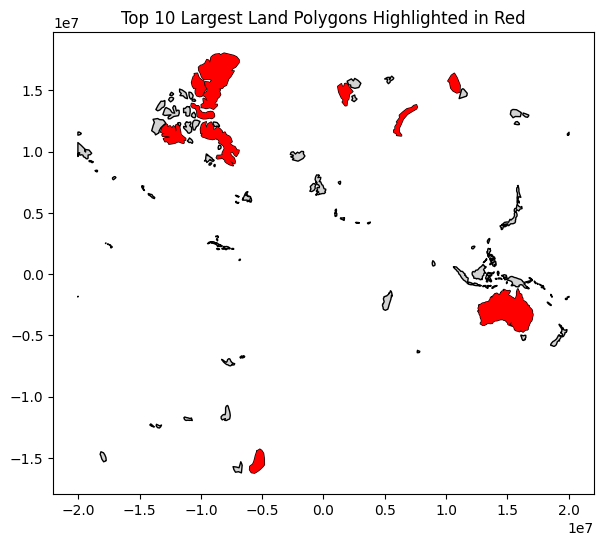

In [71]:
# Step 5: Attribute filtering
gdf_projected['area'] = gdf_projected['geometry'].area

# Sort by area descending and pick the top 10 largest polygons
largest = gdf_projected.sort_values(by='area', ascending=False).head(10)

print("Top 10 largest polygons by area:")
print(largest[['featurecla', 'scalerank', 'area']])

# Plot all polygons
ax = gdf_projected.plot(figsize=(10, 6), color='lightgray', edgecolor='black')

# Overlay largest polygons in red
largest.plot(ax=ax, color='red')

plt.title('Top 10 Largest Land Polygons Highlighted in Red')
plt.show()

## 🗺️ Attribute Filtering: Highlighting the Largest Land Polygons

In this section, we performed attribute filtering based on polygon **area** to identify the **top 10 largest land features** in the dataset.

After calculating area in a projected CRS (EPSG:3857), we sorted polygons in descending order and selected the largest entries. These were then **highlighted in red** on top of a base map showing all polygons in light gray.

### 📌 Insights & Takeaways

- Filtering by attributes like area enables **targeted spatial analysis**, such as identifying dominant land masses.
- Using visual overlays helps **clearly communicate spatial hierarchies**.
- This approach is useful for prioritizing features by size, relevance, or other meaningful metrics.

## 🧾 Conclusion

This assignment demonstrated the foundational principles and practical workflow of geographic data science using Python. By leveraging libraries such as GeoPandas, we efficiently handled spatial vector data, transformed coordinate reference systems (CRS), and performed attribute-based filtering and visualization.

The process highlighted the critical importance of using projected CRSs (like EPSG:3857) for accurate area calculations. Attempting such computations in a geographic CRS (like EPSG:4326) yields results in degrees², which are not meaningful for real-world analysis. By transforming to a projected CRS, we obtained area values in square meters, enabling effective statistical comparison and visualization.

Moreover, attribute filtering allowed us to extract insights from spatial data — in this case, identifying and visualizing the ten largest land polygons. This method is essential in many geospatial applications, from urban planning to environmental monitoring.

### 🔗 References

- Geographic Data Science with Python (GDSwP), Chapters 1–2 Source: [https://geographicdata.science/book/intro.html](https://geographicdata.science/book/intro.html)
- Automating GIS Processes (AutoGIS): "Getting started with Python GIS" Source: [https://autogis-site.readthedocs.io/en/latest/](https://autogis-site.readthedocs.io/en/latest/) 
- Natural Earth Dataset. Accessed via `geodatasets` package. Source: [https://www.naturalearthdata.com](https://www.naturalearthdata.com)  

